# Visualizing V(D)J data

## Integration with `scanpy`
Now that we have both 1) a pre-processed V(D)J data in `Dandelion` object and 2) matching `AnnData` object, we can start finding clones and *'integrate'* the results. All the V(D)J (AIRR) analyses files can be saved as *.tsv* format so that it can be used in other tools like *immcantation*, *immunoarch*, *vdjtools*, etc.

The results can also be ported into the `AnnData` object for access to more plotting functions provided through `scanpy` [[Wolf2018]](https://doi.org/10.1186/s13059-017-1382-0).

In [1]:
import os
import dandelion as ddl
import scanpy as sc

sc.settings.verbosity = 3

# change to tutorials directory
os.chdir("dandelion_tutorial")

### Read in the previously saved files

I will work with the same example from the previous section since I have the `AnnData` object saved and vdj table filtered.

In [2]:
adata = sc.read_h5ad("adata.h5ad")
adata

AnnData object with n_obs × n_vars = 23702 × 1402
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'umi_count_B_VDJ', 'umi_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_V

In [3]:
vdj = ddl.read_h5ddl("dandelion_results_simplified.h5ddl")
vdj

Dandelion class object with n_obs = 2111 and n_contigs = 5050
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_blastn', 

### `ddl.tl.transfer`

We can sync the V(D)J data from `Dandelion` object to the matching `AnnData` object using `ddl.tl.transfer` function.

In [4]:
ddl.tl.transfer(adata, vdj)
adata

Transferring network
 finished: updated `.obs` with `.metadata`
wrote `.obsm['X_vdj']` and `.obsm['X_vdj_expanded']`
wrote adata.obsp['connectivities'] & ['distances'] from graph[0]
stored RNA matrices under rna_* keys (stashed)
stored vdj matrices under 'vdj_connectivities' (+ '_expanded' and + '_full' if available)
added `.uns['clone_id']` clone-level mapping (0:00:00)


AnnData object with n_obs × n_vars = 23702 × 1402
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'umi_count_B_VDJ', 'umi_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_V

<div class="alert alert-info">

Note
    
If a column with the same name between `Dandelion.metadata` and `AnnData.obs` already exists, `tl.transfer` will not overwrite the column in the `AnnData` object. This can be toggled to overwrite all with `overwrite=True` or `overwrite=["column_name1", "column_name2"]` if only some columns are to be overwritten.

</div>

You can see that `AnnData` object now contains a couple more columns in the `.obs` slot, corresponding to the metadata that is returned after `tl.generate_network`, and newly populated `.obsm` and `.obsp` slots. The original RNA connectivities and distances are now added into the `.obsp` slot as well.

## Plotting in `scanpy`

### `pl.clone_network`

So now, basically we can plot in `scanpy` with their plotting modules. I've included a plotting function in <b>dandelion</b>, `pl.clone_network`, which is really just a wrapper of their `pl.embedding` module.

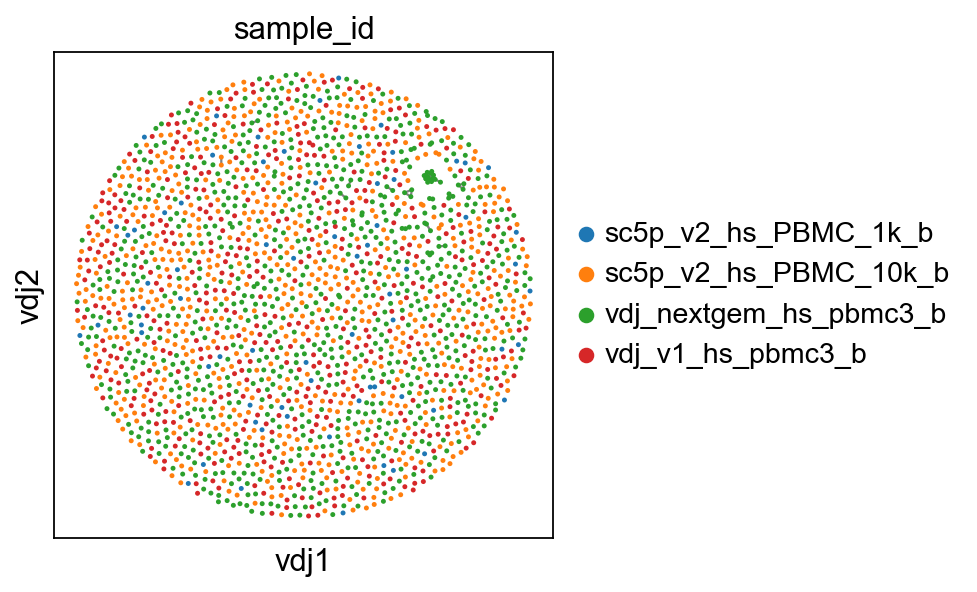

In [5]:
sc.set_figure_params(figsize=[4, 4])
ddl.pl.clone_network(adata, color=["sample_id"], edges_width=1, size=20)

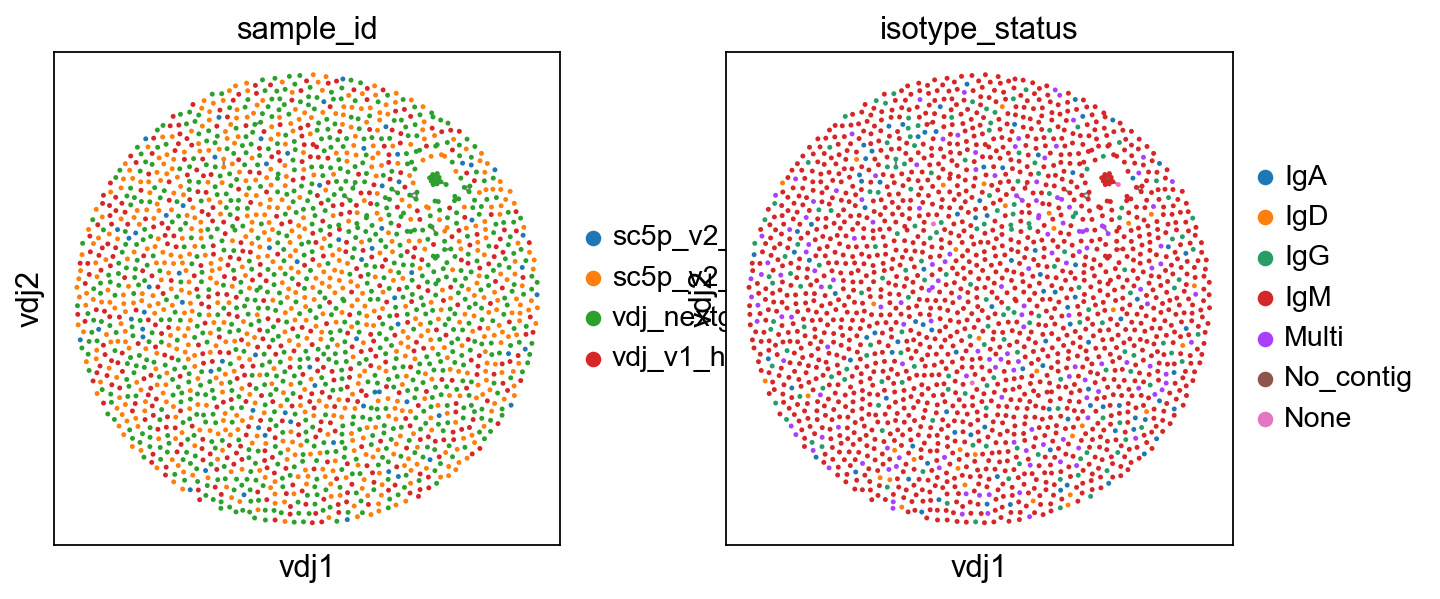

In [6]:
ddl.pl.clone_network(
    adata, color=["sample_id", "isotype_status"], edges_width=1, size=20
)

To show only expanded clones, we swap the view with a new function.

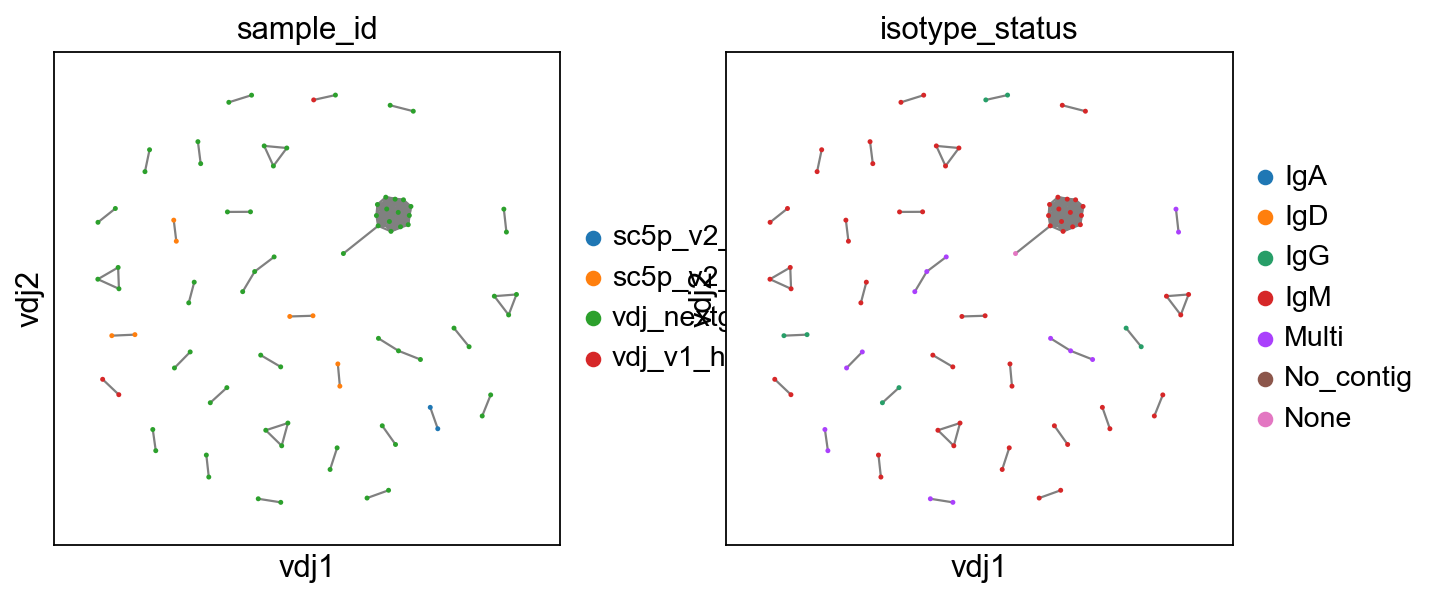

In [7]:
ddl.tl.clone_view(adata, mode="expanded")
ddl.pl.clone_network(
    adata, color=["sample_id", "isotype_status"], edges_width=1, size=20
)

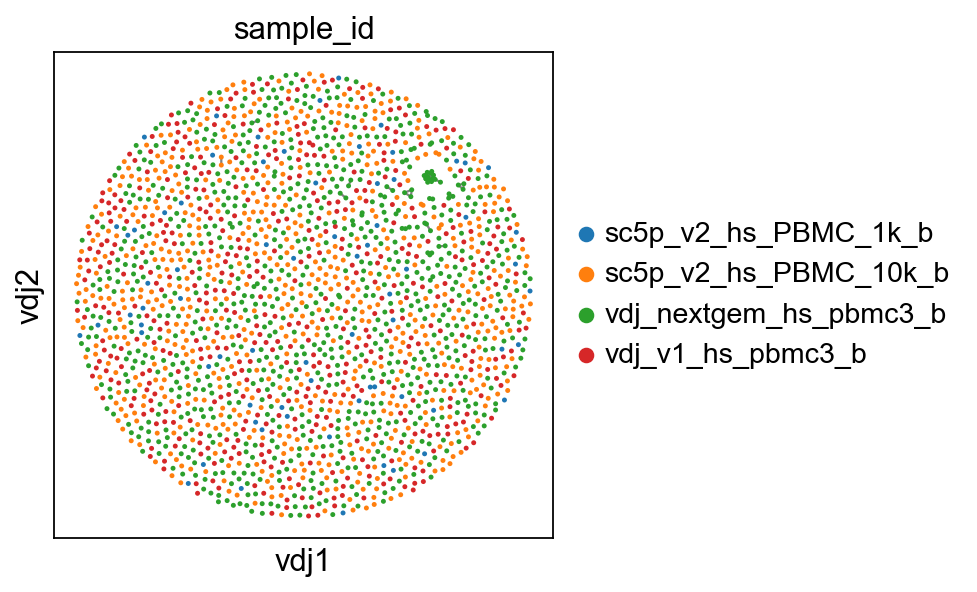

In [8]:
# swap back to "all"
ddl.tl.clone_view(adata, mode="all")
ddl.pl.clone_network(adata, color=["sample_id"], edges_width=1, size=20)

The `mode` can also be swap to `rna` to reset the neighborhood graph to the RNA-based one for any downstream analysis. If `mode` is set to `None`, then the user can specify the keys in `.obsp` and `.obsm` to set as active by providing `connectivities_key`, `distances_key`, and `embedding_key`.

<div class="alert alert-info">

Note

If you want a slighltly faster way to compute the layout, you might want to use the `sfdp` layout method.
    
</div>

Generating network layout from pre-computed network
Generating network layout
Computing network layout
Computing expanded network layout
 finished.
   Updated Dandelion object
:    'layout', graph layout
 (0:00:03)
Transferring network
 finished: updated `.obs` with `.metadata`
wrote `.obsm['X_vdj']` and `.obsm['X_vdj_expanded']`
wrote adata.obsp['connectivities'] & ['distances'] from graph[0]
stored RNA matrices under rna_* keys (stashed)
stored vdj matrices under 'vdj_connectivities' (+ '_expanded' and + '_full' if available)
added `.uns['clone_id']` clone-level mapping (0:00:03)


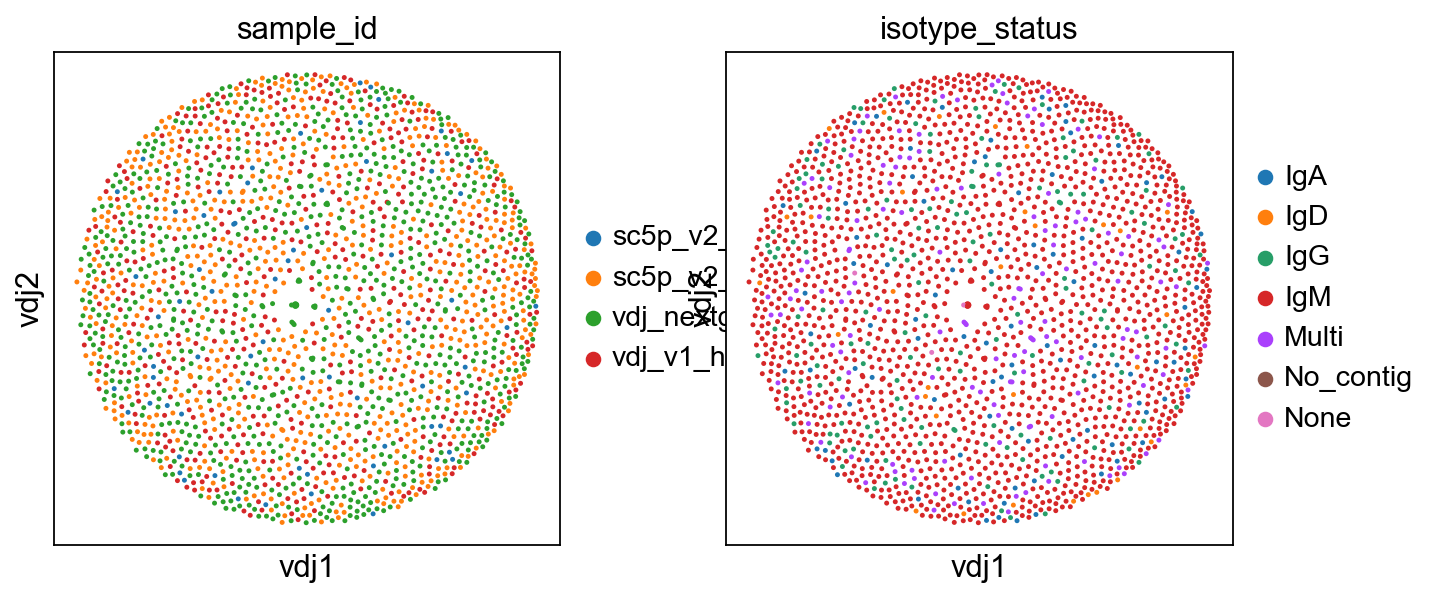

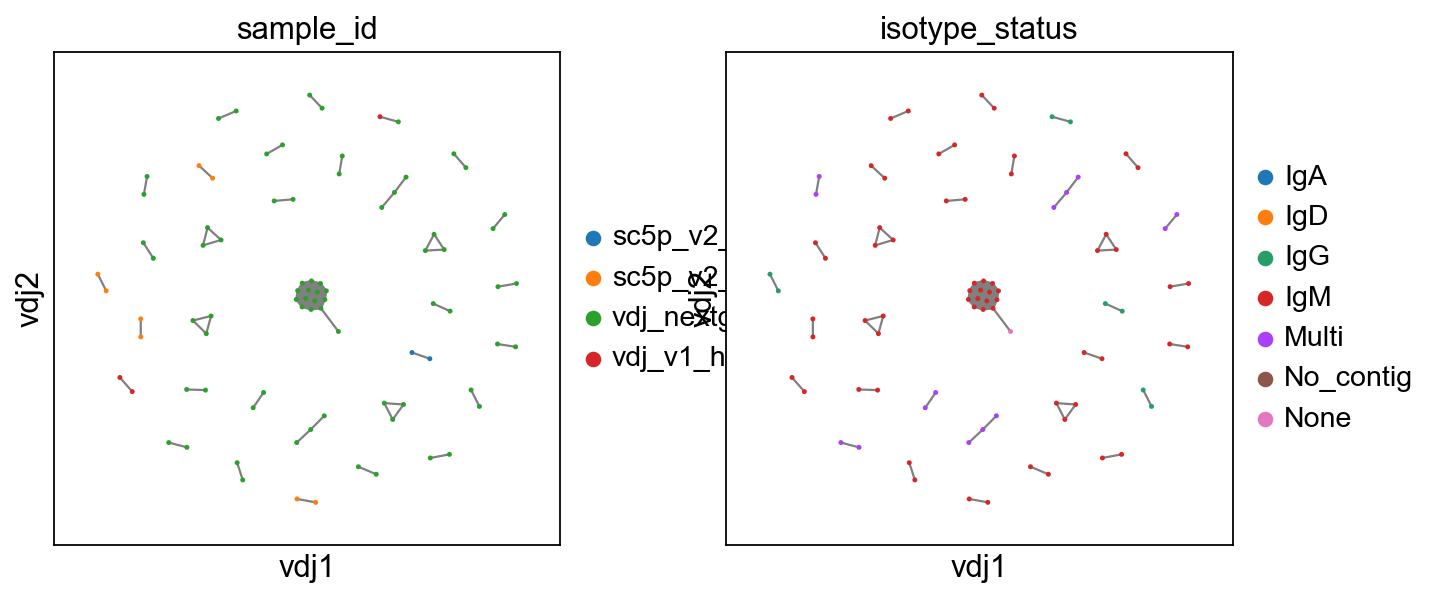

In [9]:
# making a copy of both adata and vdj
vdj2 = vdj.copy()
adata2 = adata.copy()
# recompute layout with original method
ddl.tl.generate_network(vdj2, layout_method="sfdp")
ddl.tl.transfer(adata2, vdj2)
# visualise
ddl.pl.clone_network(
    adata2, color=["sample_id", "isotype_status"], edges_width=1, size=20
)
# swap to expanded mode.
ddl.tl.clone_view(adata2, mode="expanded")
# show where clones/clonotypes have more than 1 cell
ddl.pl.clone_network(
    adata2, color=["sample_id", "isotype_status"], edges_width=1, size=20
)

### `tl.extract_edge_weights`

We provide an edge weight extractor tool `tl.extract_edge_weights` to retrieve the edge weights that can be used to specify the edge widths according to weight/distance.

Generating network


Setting up data: 4422it [00:00, 8069.99it/s]

Calculating distance matrix  with distance_mode = 'clone'




100%|██████████| 2312/2312 [00:00<00:00, 17151.46it/s]

Distances calculated in 0.14 seconds



Linking edges : 100%|██████████| 2061/2061 [00:01<00:00, 1979.18it/s]

Generating network layout


To benefit from faster layout computation, please install graph-tool and use layout_method='sfdp': conda install -c conda-forge graph-tool
This message will only be shown once per session.
Computing network layout
Computing expanded network layout
 finished.
   Updated Dandelion object
:    'layout', graph layout
 (0:00:15)
Transferring network
 finished: updated `.obs` with `.metadata`
wrote `.obsm['X_vdj']` and `.obsm['X_vdj_expanded']`
wrote adata.obsp['connectivities'] & ['distances'] from graph[0]
stored RNA matrices under rna_* keys (stashed)
stored vdj matrices under 'vdj_connectivities' (+ '_expanded' and + '_full' if available)
added `.uns['clone_id']` clone-level mapping (0:00:00)


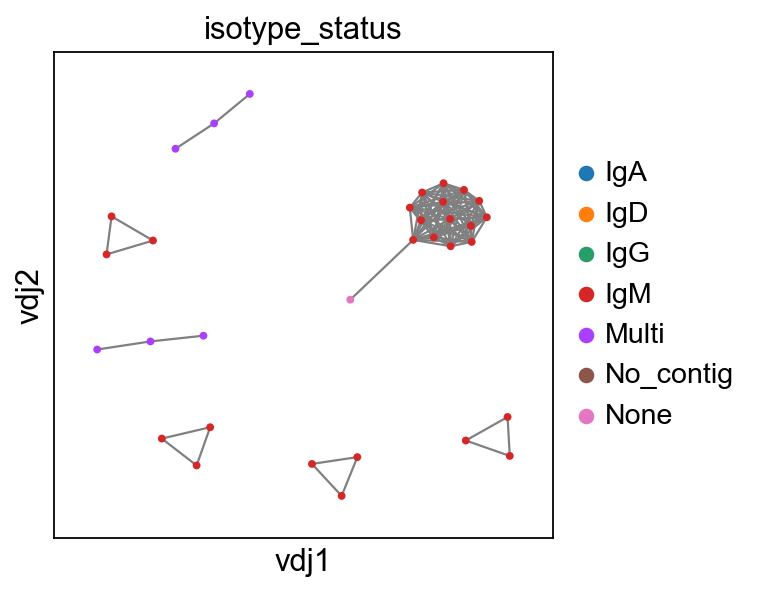

In [10]:
# To illustrate this, first recompute the graph by specifying a minimum size
vdjx = vdj.copy()
adatax = adata.copy()
ddl.tl.generate_network(
    vdjx, min_size=3
)  # second graph will only contain clones/clonotypes with >= 3 cells
ddl.tl.transfer(adatax, vdjx)
edgeweights = [
    1 / (e + 1) for e in ddl.tl.extract_edge_weights(vdjx)
]  # invert and add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge.
# therefore, the thicker the line, the shorter the edit distance.
ddl.tl.clone_view(adatax, mode="expanded")
ddl.pl.clone_network(
    adatax,
    color=["isotype_status"],
    legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,
)

`None` here means there is no isotype information i.e. no `c_call`. If `No_contig` appears, it means there's no V(D)J information.

You can interact with `pl.clone_network` just as how you interact with the rest of the scatterplot modules in `scanpy`.

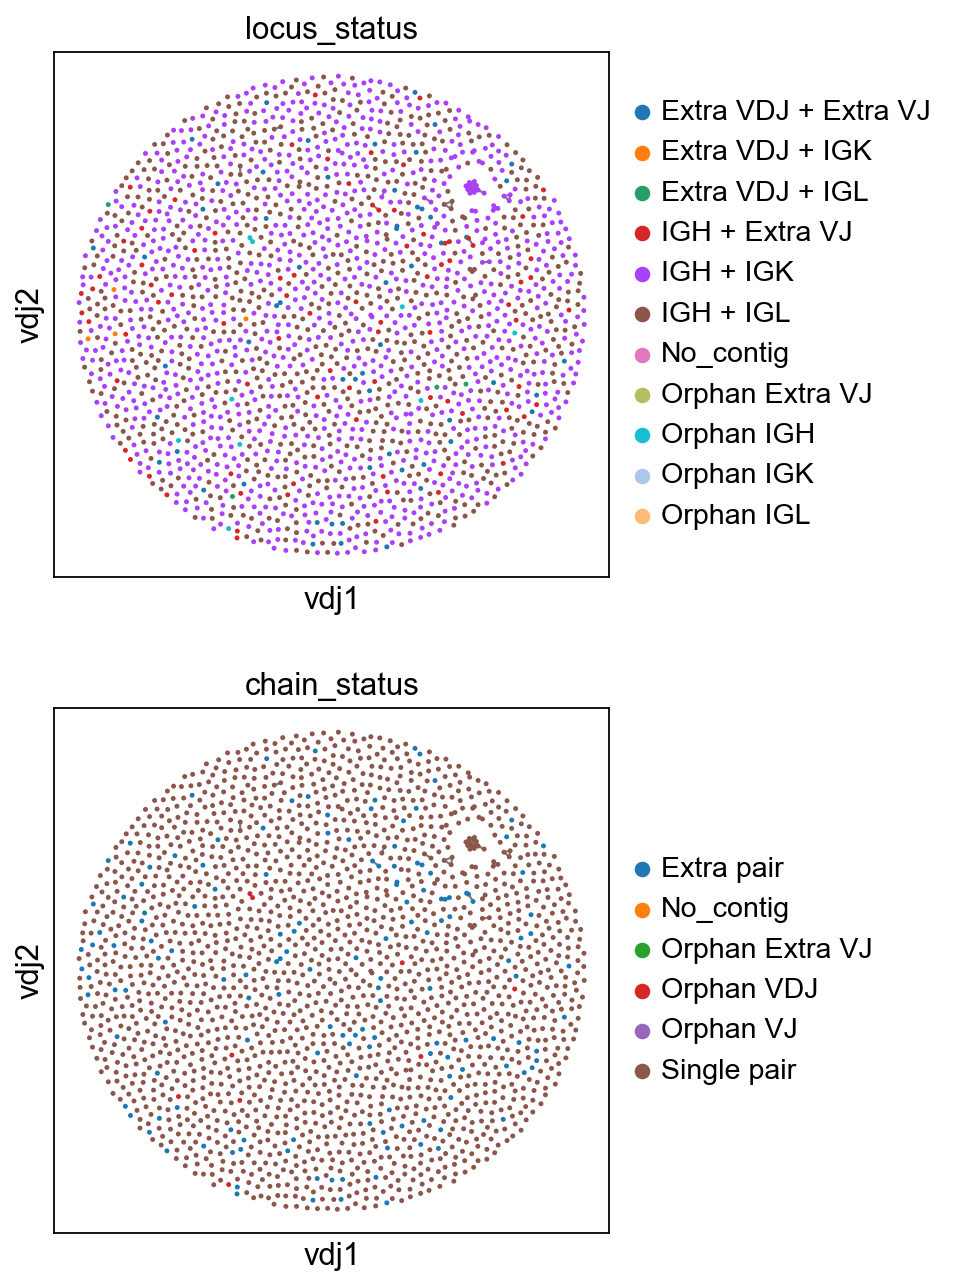

In [11]:
sc.set_figure_params(figsize=[4, 4.5])
ddl.pl.clone_network(
    adata,
    color=["locus_status", "chain_status"],
    ncols=1,
    legend_fontoutline=3,
    edges_width=1,
    size=20,
)

you should be able to save the adata object and interact with it as per normal.

In [12]:
adata.write("adata.h5ad", compression="gzip")

## Calculating size of clones

### `ddl.tl.clone_size`

Sometimes it's useful to evaluate the size of the clone. Here `ddl.tl.clone_size` does a simple calculation to enable that. From version 1.0.0 onwards, this function has been refactored and now also returning as proportion and can handle groups. There are new outputs e.g. clone size bins for rare, small, medium etc. similar to scRepertoire!

In [13]:
ddl.tl.clone_size(vdj)
vdj.metadata[["clone_id_size", "clone_id_size_prop", "clone_id_size_category"]]

clone_id_size  clone_id_size_prop  \
sc5p_v2_hs_PBMC_10k_b_AAACCTGTCCGTTGTC              1            0.000474   
sc5p_v2_hs_PBMC_10k_b_AAACCTGTCGAGAACG              1            0.000474   
sc5p_v2_hs_PBMC_10k_b_AAACCTGTCTTGAGAC              1            0.000474   
sc5p_v2_hs_PBMC_10k_b_AAACGGGAGCGACGTA              1            0.000474   
sc5p_v2_hs_PBMC_10k_b_AAACGGGCACTGTTAG              1            0.000474   
...                                               ...                 ...   
vdj_v1_hs_pbmc3_b_TTTCCTCAGCAATATG                  1            0.000474   
vdj_v1_hs_pbmc3_b_TTTCCTCAGCGCTTAT                  1            0.000474   
vdj_v1_hs_pbmc3_b_TTTCCTCAGGGAAACA                  1            0.000474   
vdj_v1_hs_pbmc3_b_TTTGCGCCATACCATG                  1            0.000474   
vdj_v1_hs_pbmc3_b_TTTGGTTGTAGGCATG                  1            0.000474   

                                       clone_id_size_category  
sc5p_v2_hs_PBMC_10k_b_AAACCTGTCCGTTGTC                  Small  
sc5p_v2_hs_PBMC_10k_b_AAACCTGTCGAGAACG                  Small  
sc5p_v2_hs_PBMC_10k_b_AAACCTGTCTTGAGAC                  Small  
sc5p_v2_hs_PBMC_10k_b_AAACGGGAGCGACGTA                  Small  
sc5p_v2_hs_PBMC_10k_b_AAACGGGCACTGTTAG                  Small  
...                                                       ...  
vdj_v1_hs_pbmc3_b_TTTCCTCAGCAATATG                      Small  
vdj_v1_hs_pbmc3_b_TTTCCTCAGCGCTTAT                      Small  
vdj_v1_hs_pbmc3_b_TTTCCTCAGGGAAACA                      Small  
vdj_v1_hs_pbmc3_b_TTTGCGCCATACCATG                      Small  
vdj_v1_hs_pbmc3_b_TTTGGTTGTAGGCATG                      Small  

[2111 rows x 3 columns]

In [14]:
vdj.metadata["clone_id_size_category"].value_counts()

clone_id_size_category
Small     2078
Medium      33
Name: count, dtype: int64

You can also compute the clone size within groups by providing the `groupby` argument.

In [15]:
ddl.tl.clone_size(vdj, groupby="isotype_status")

In [16]:
import pandas as pd

pd.crosstab(
    vdj.metadata["isotype_status"], vdj.metadata["clone_id_size_category"]
).apply(lambda r: r / r.sum() * 100, axis=1)

clone_id_size_category  Hyperexpanded       Large     Medium      Small
isotype_status                                                         
IgA                               0.0  100.000000   0.000000   0.000000
IgD                               0.0  100.000000   0.000000   0.000000
IgG                               0.0    4.705882  95.294118   0.000000
IgM                               0.0    0.000000   3.746224  96.253776
Multi                             0.0    9.333333  90.666667   0.000000
None                            100.0    0.000000   0.000000   0.000000

In [17]:
ddl.tl.transfer(adata, vdj)

Transferring network
 finished: updated `.obs` with `.metadata`
wrote `.obsm['X_vdj']` and `.obsm['X_vdj_expanded']`
wrote adata.obsp['connectivities'] & ['distances'] from graph[0]
stored RNA matrices under rna_* keys (stashed)
stored vdj matrices under 'vdj_connectivities' (+ '_expanded' and + '_full' if available)
added `.uns['clone_id']` clone-level mapping (0:00:00)


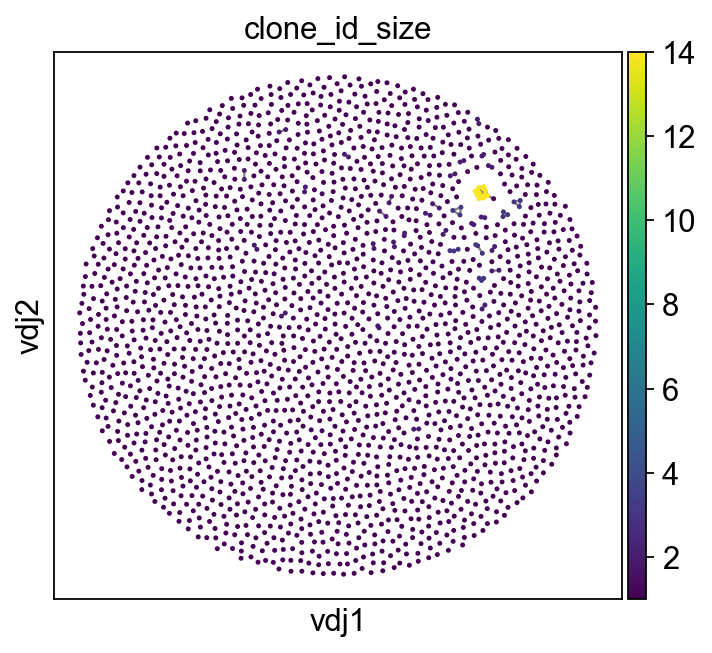

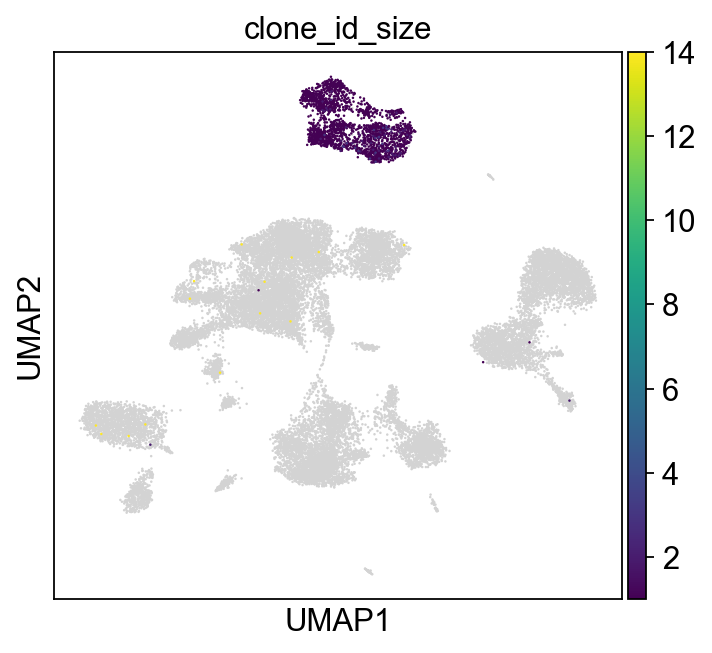

In [18]:
sc.set_figure_params(figsize=[5, 4.5])
ddl.pl.clone_network(
    adata,
    color=["clone_id_size"],
    legend_fontoutline=3,
    edges_width=1,
    size=20,
    color_map="viridis",
)
sc.pl.umap(adata, color=["clone_id_size"], color_map="viridis")

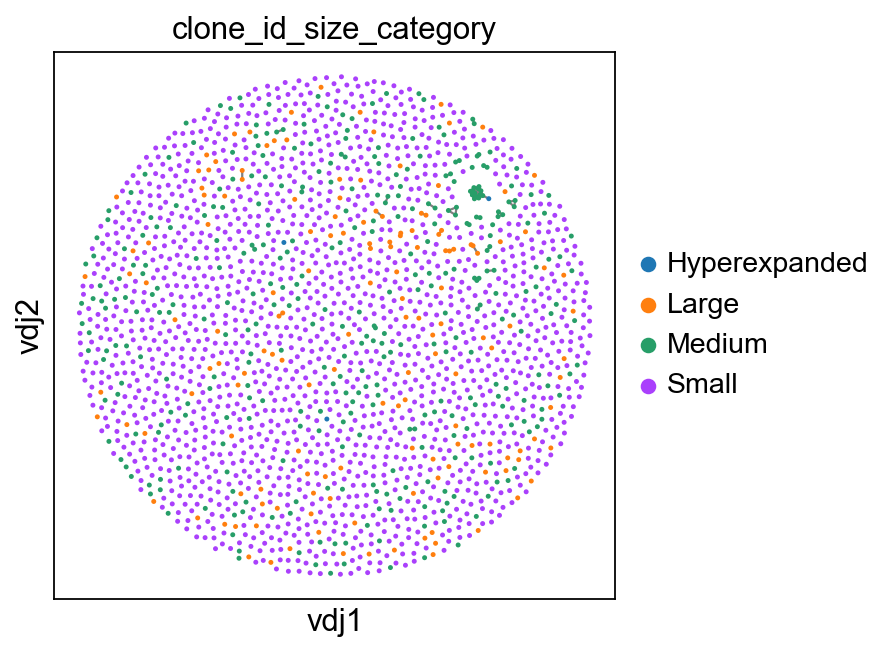

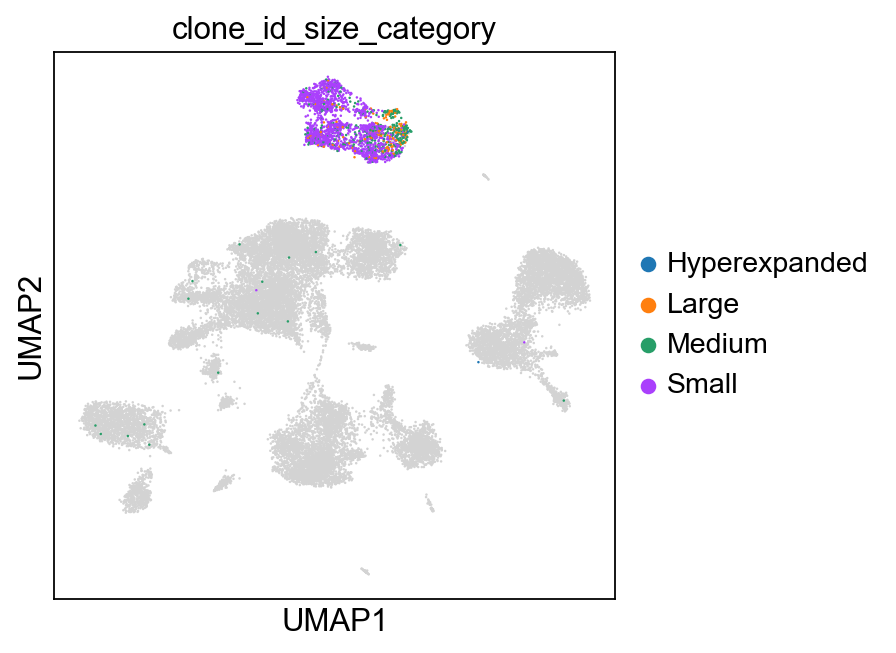

In [19]:
sc.set_figure_params(figsize=[4.5, 4.5])
ddl.pl.clone_network(
    adata,
    color=["clone_id_size_category"],
    legend_fontoutline=3,
    edges_width=1,
    size=20,
    groups=["Small", "Medium", "Large", "Hyperexpanded"],
    na_in_legend=False,
)
sc.pl.umap(
    adata,
    color=["clone_id_size_category"],
    groups=["Small", "Medium", "Large", "Hyperexpanded"],
    na_in_legend=False,
)

You can also specify `max_size` to clip off the calculation at a fixed value.

In [20]:
ddl.tl.clone_size(vdj, max_size=3)
ddl.tl.transfer(adata, vdj)

Transferring network
 finished: updated `.obs` with `.metadata`
wrote `.obsm['X_vdj']` and `.obsm['X_vdj_expanded']`
wrote adata.obsp['connectivities'] & ['distances'] from graph[0]
stored RNA matrices under rna_* keys (stashed)
stored vdj matrices under 'vdj_connectivities' (+ '_expanded' and + '_full' if available)
added `.uns['clone_id']` clone-level mapping (0:00:00)


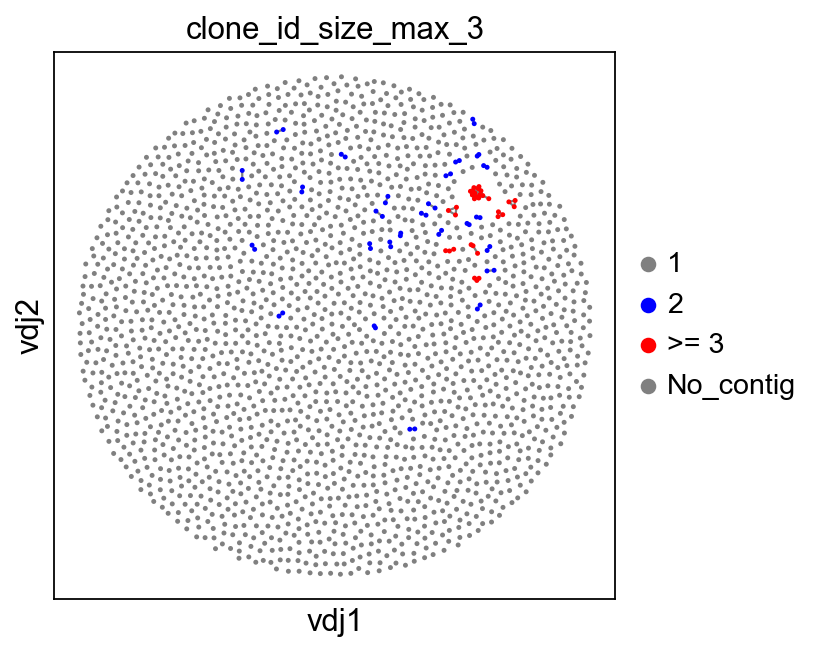

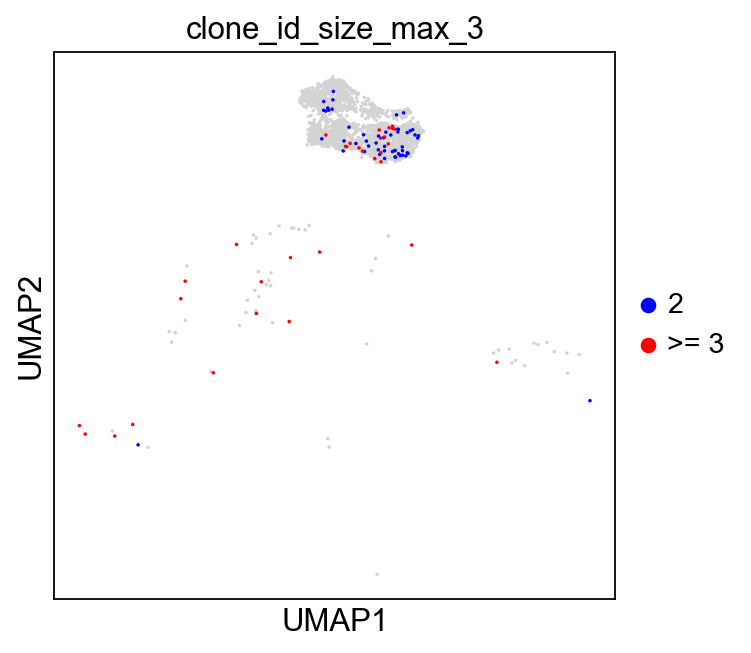

In [21]:
sc.set_figure_params(figsize=[4.5, 4.5])
ddl.pl.clone_network(
    adata,
    color=["clone_id_size_max_3"],
    ncols=2,
    legend_fontoutline=3,
    edges_width=1,
    palette=["grey", "blue", "red"],
    size=20,
    na_in_legend=False,
)
sc.pl.umap(
    adata[adata.obs["has_contig"] == "True"],
    color=["clone_id_size_max_3"],
    groups=["2", ">= 3"],
    size=10,
    na_in_legend=False,
)

## Additional plotting functions

### `ddl.pl.barplot`
`pl.barplot` is a generic barplot function that will plot items in the metadata slot as a bar plot. This function will also interact with `.obs` slot if a `scanpy` object is used in place of `Dandelion` object. However, if your `scanpy` object holds a lot of non-B cells, then the plotting will be just be saturated with nan values.

Let's first slice the `Dandelion` object to only include cells with at most one heavy chain.

In [22]:
vdj_subset = vdj[
    vdj.metadata["chain_status"].isin(["Single pair", "Orphan VDJ"])
]
vdj_subset

Dandelion class object with n_obs = 1961 and n_contigs = 4483
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_blastn', 

/Users/uqztuong/Documents/GitHub/dandelion/src/dandelion/plotting/_plotting.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



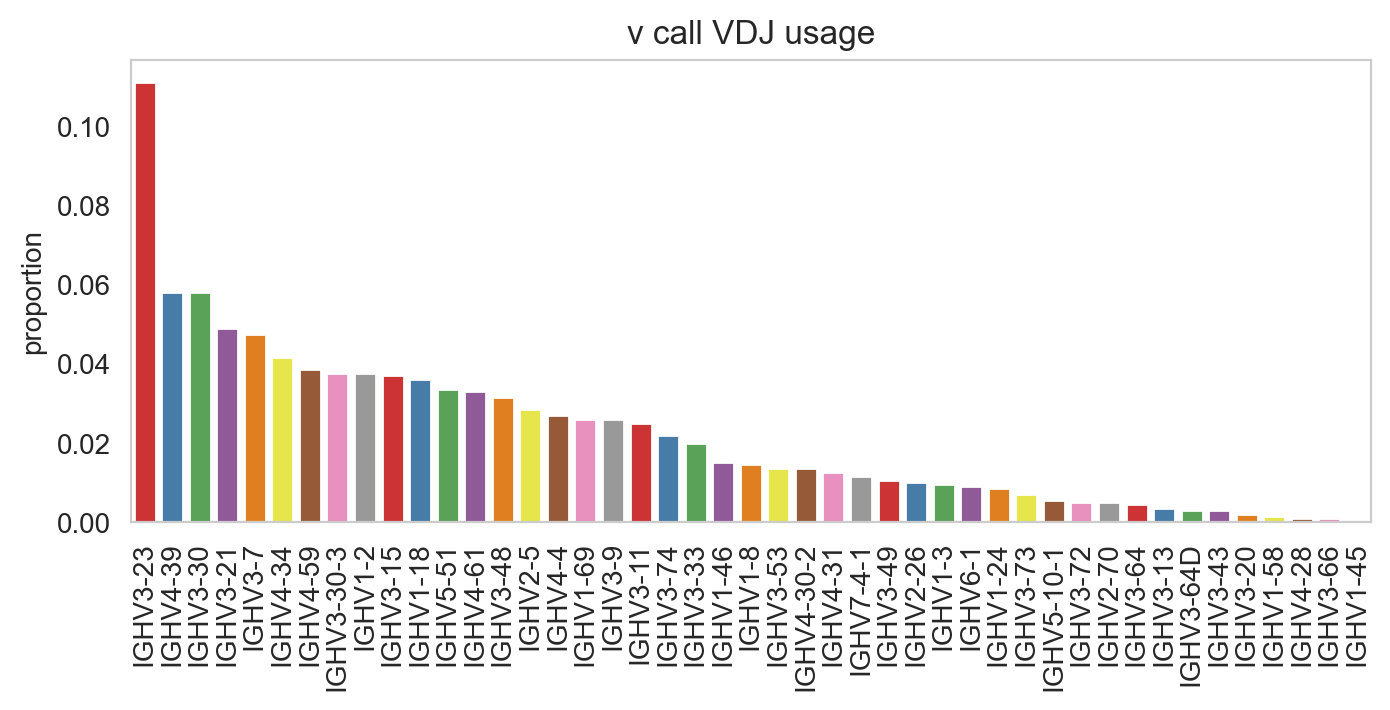

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)

ddl.pl.barplot(
    vdj_subset,
    color="v_call_VDJ",
)
plt.show()

You can prevent it from sorting by specifying `sort_descending = None`. Colours can be changed with `palette` option.

/Users/uqztuong/Documents/GitHub/dandelion/src/dandelion/plotting/_plotting.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



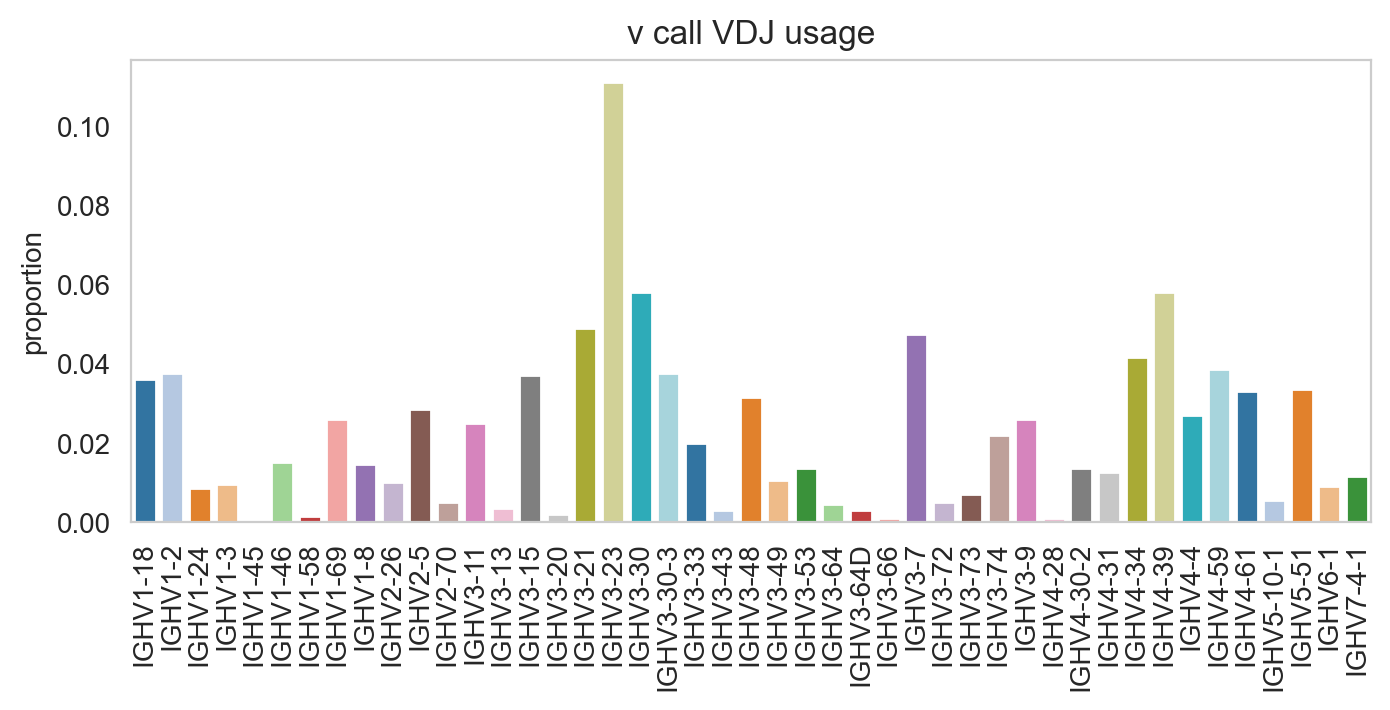

In [24]:
ddl.pl.barplot(
    vdj_subset,
    color="v_call_VDJ",
    sort_descending=None,
    palette="tab20",
)
plt.show()

Specifying `normalize = False` will change the y-axis to counts.

/Users/uqztuong/Documents/GitHub/dandelion/src/dandelion/plotting/_plotting.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



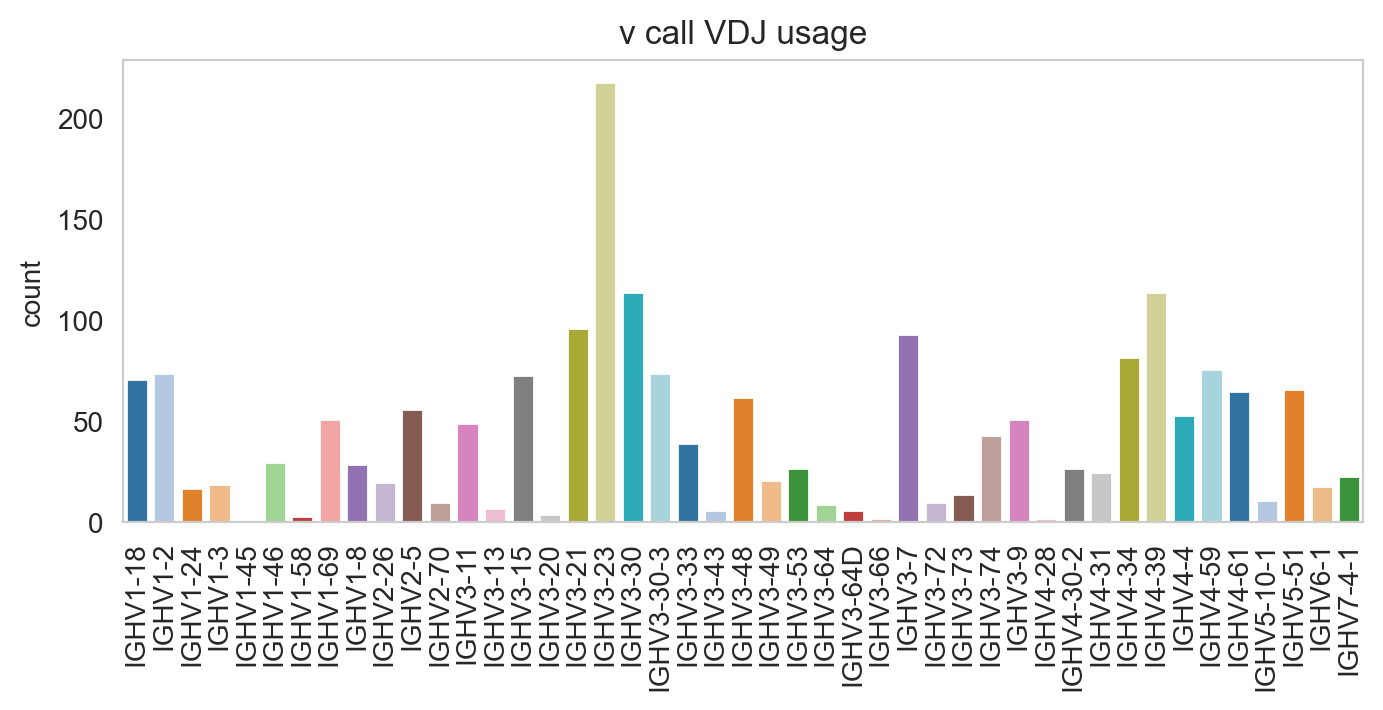

In [25]:
ddl.pl.barplot(
    vdj_subset,
    color="v_call_VDJ",
    normalize=False,
    sort_descending=None,
    palette="tab20",
)
plt.show()

### `pl.stackedbarplot`
`pl.stackedbarplot` is similar to above but can split between specified groups. Some examples below:

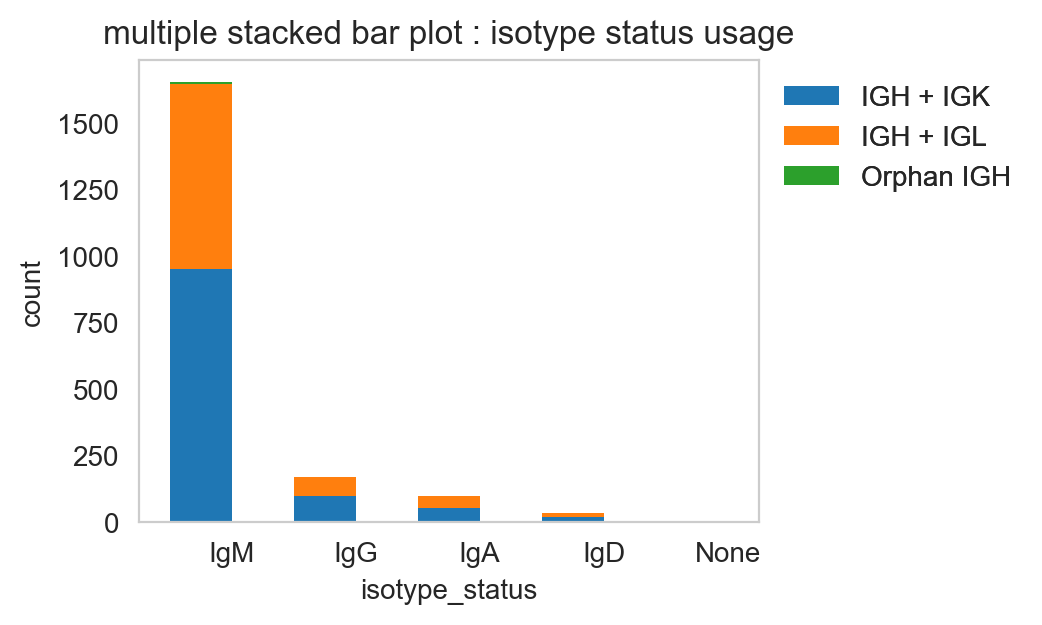

In [26]:
ddl.pl.stackedbarplot(
    vdj_subset,
    color="isotype_status",
    groupby="locus_status",
    xtick_rotation=0,
    figsize=(4, 3),
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

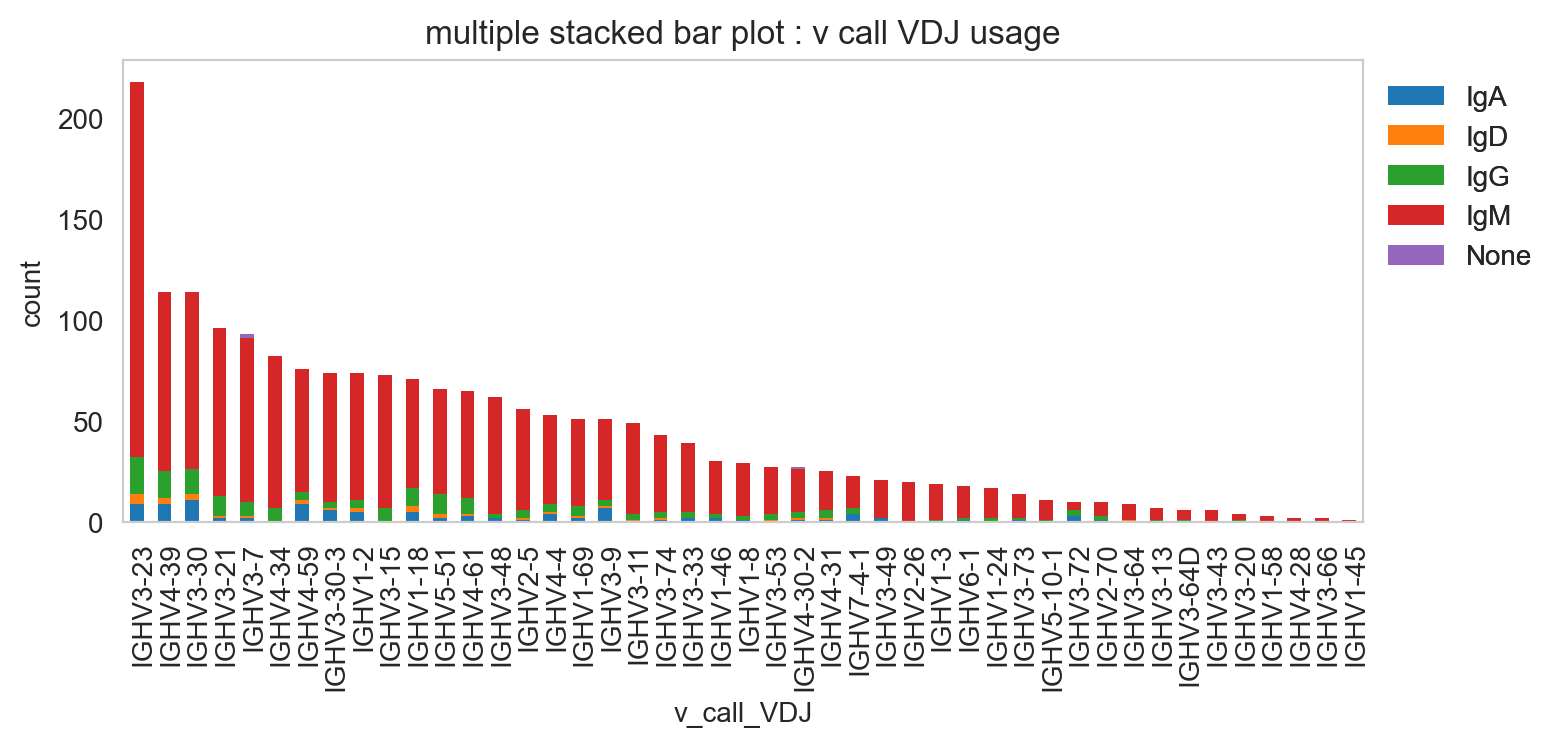

In [27]:
ddl.pl.stackedbarplot(
    vdj_subset,
    color="v_call_VDJ",
    groupby="isotype_status",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

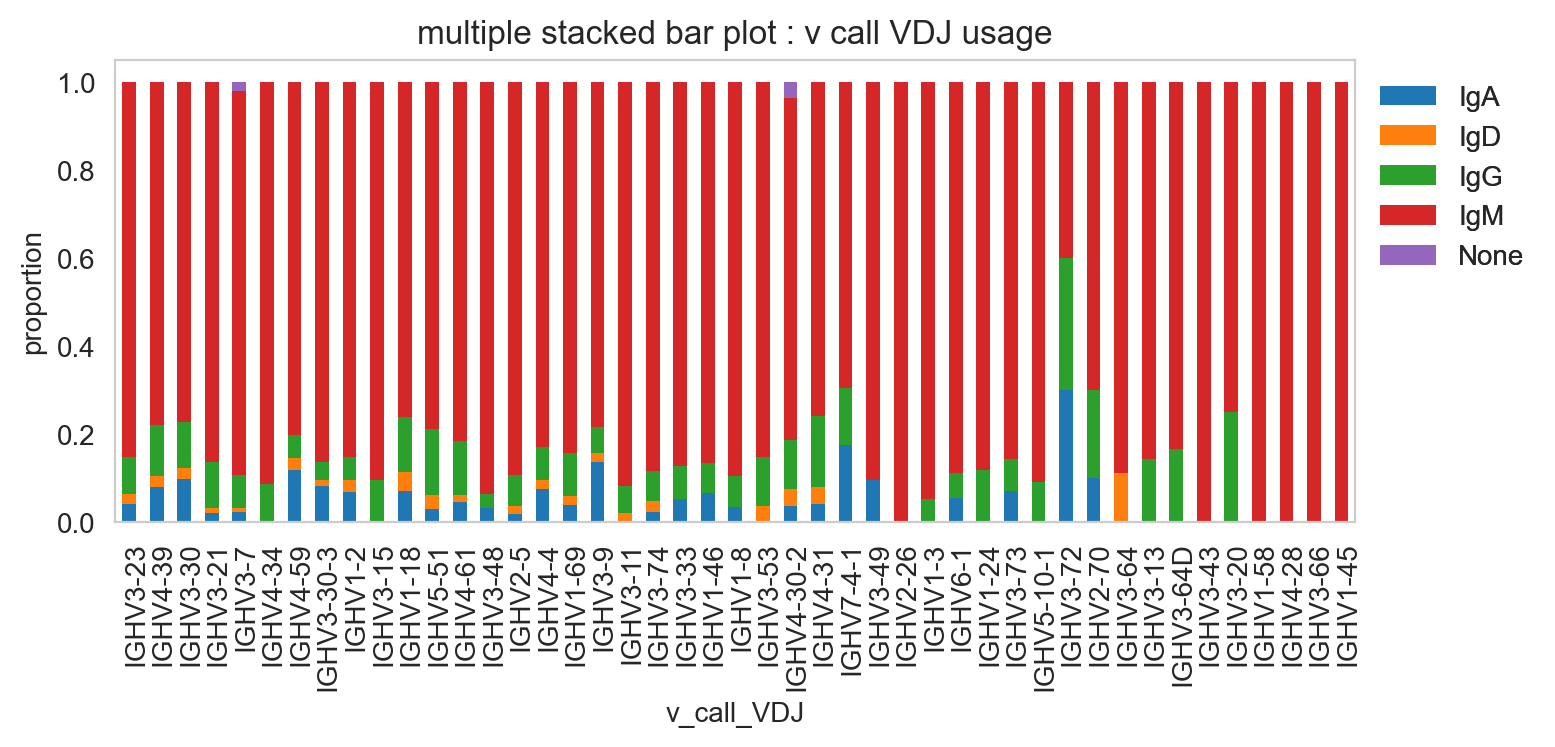

In [28]:
ddl.pl.stackedbarplot(
    vdj_subset,
    color="v_call_VDJ",
    groupby="isotype_status",
    normalize=True,
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

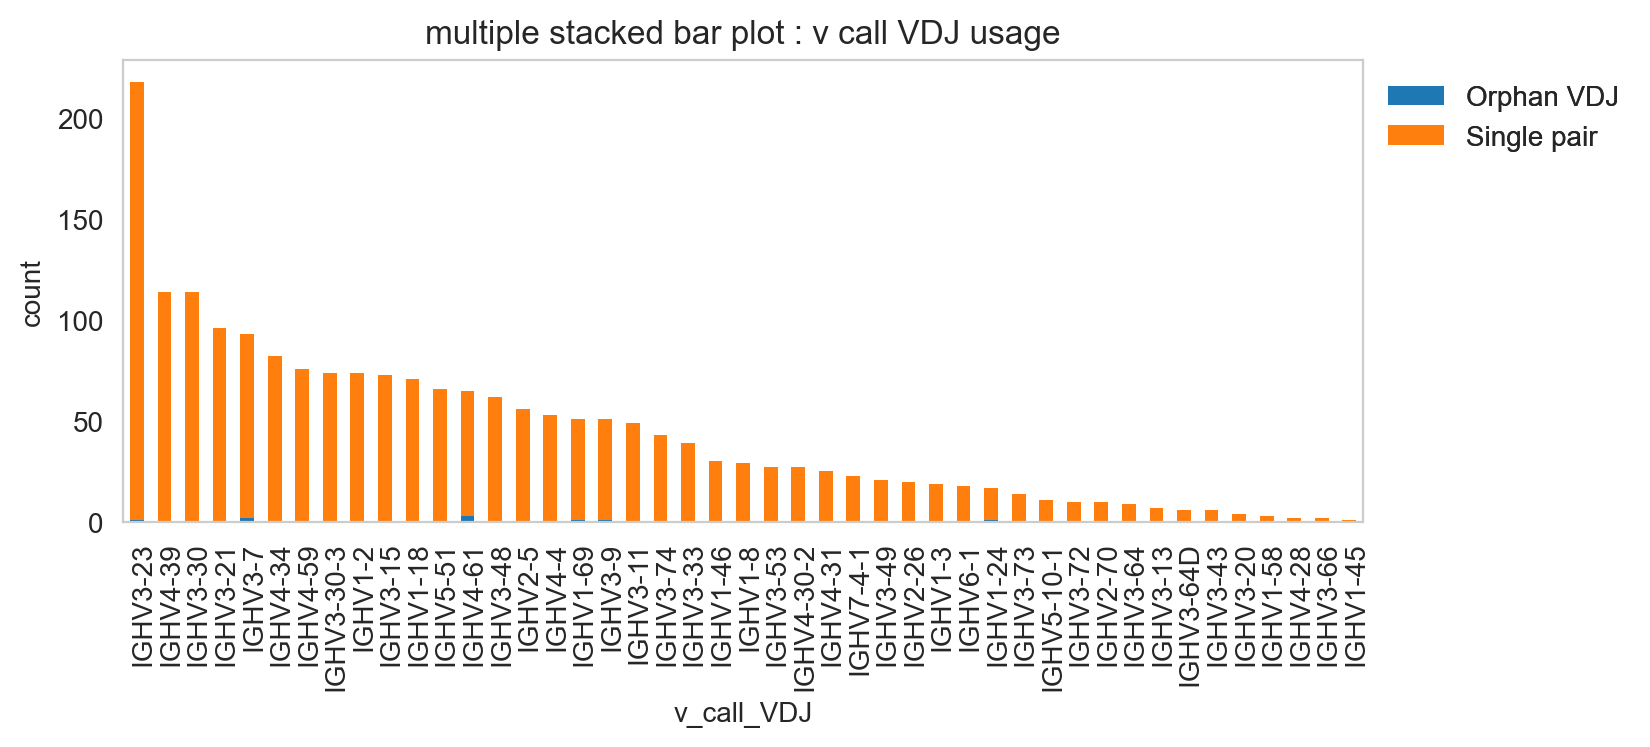

In [29]:
ddl.pl.stackedbarplot(
    vdj_subset,
    color="v_call_VDJ",
    groupby="chain_status",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

It's obviously more useful if you don't have too many groups, but you could try and plot everything and jiggle the legend options and color.

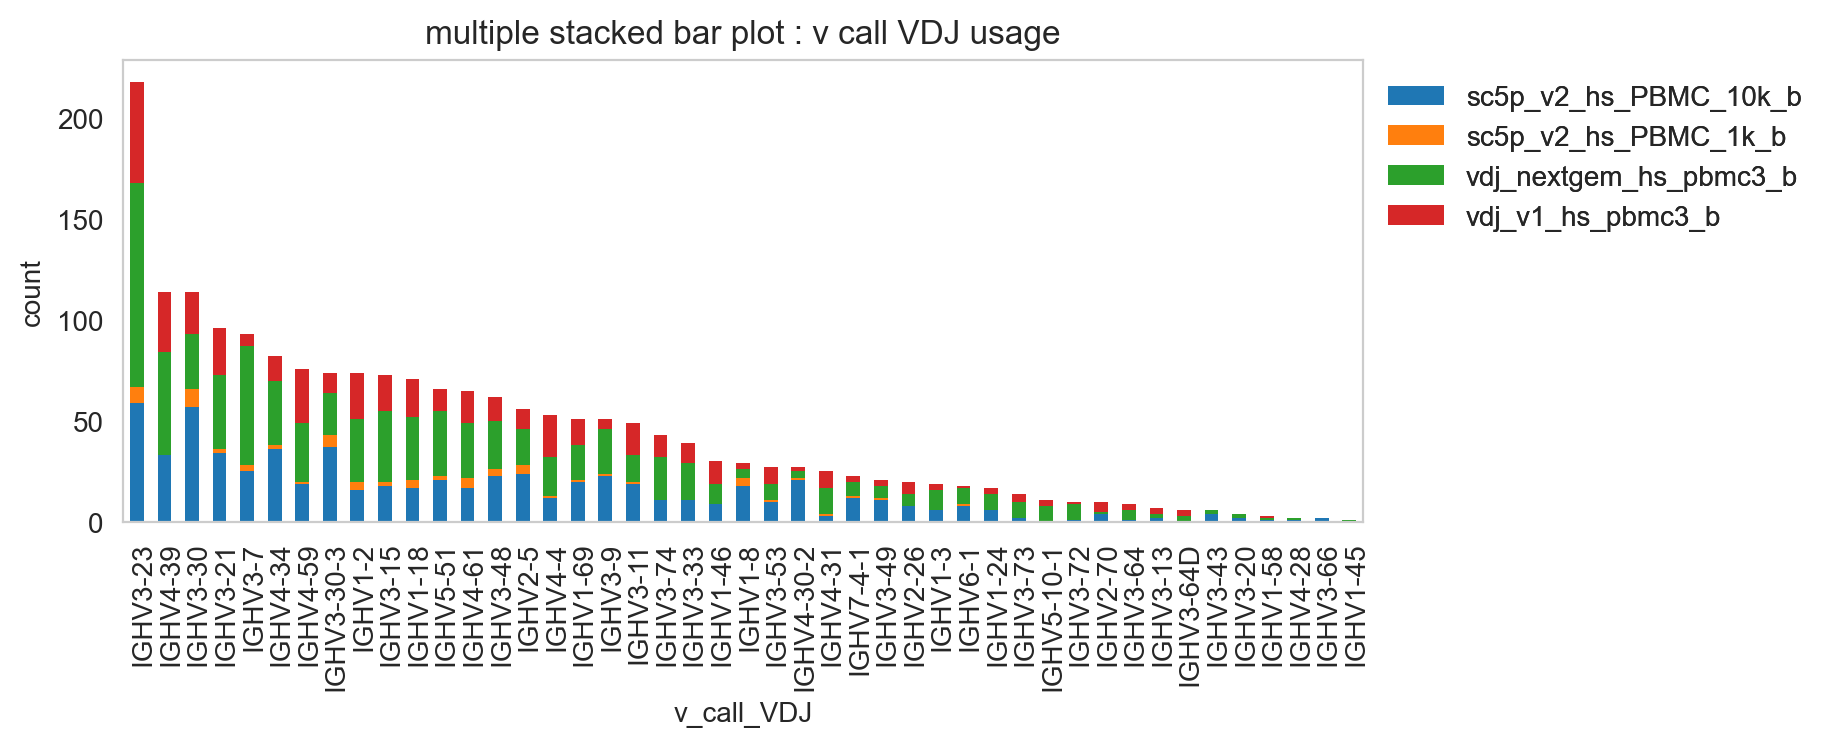

In [30]:
ddl.pl.stackedbarplot(
    vdj_subset,
    color="v_call_VDJ",
    groupby="sample_id",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

### `ddl.pl.spectratype`
Spectratype plots contain info displaying CDR3 length distribution for specified groups. For this function, the current method only works for `dandelion` objects as it requires access to the contig-indexed *.data* slot.

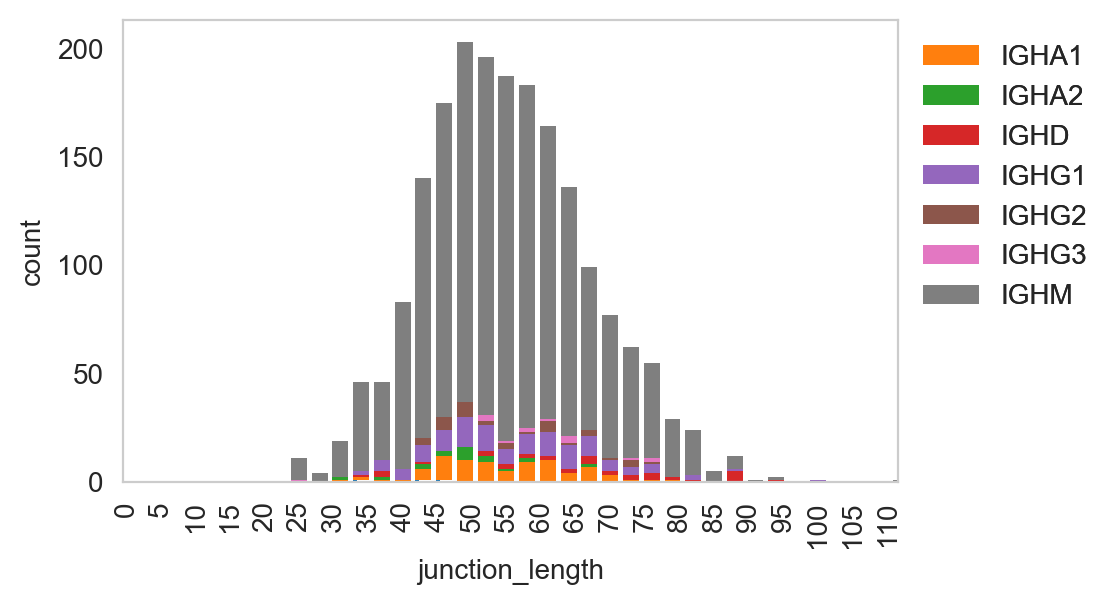

In [31]:
ddl.pl.spectratype(
    vdj_subset,
    color="junction_length",
    groupby="c_call",
    locus="IGH",
    width=2.3,
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

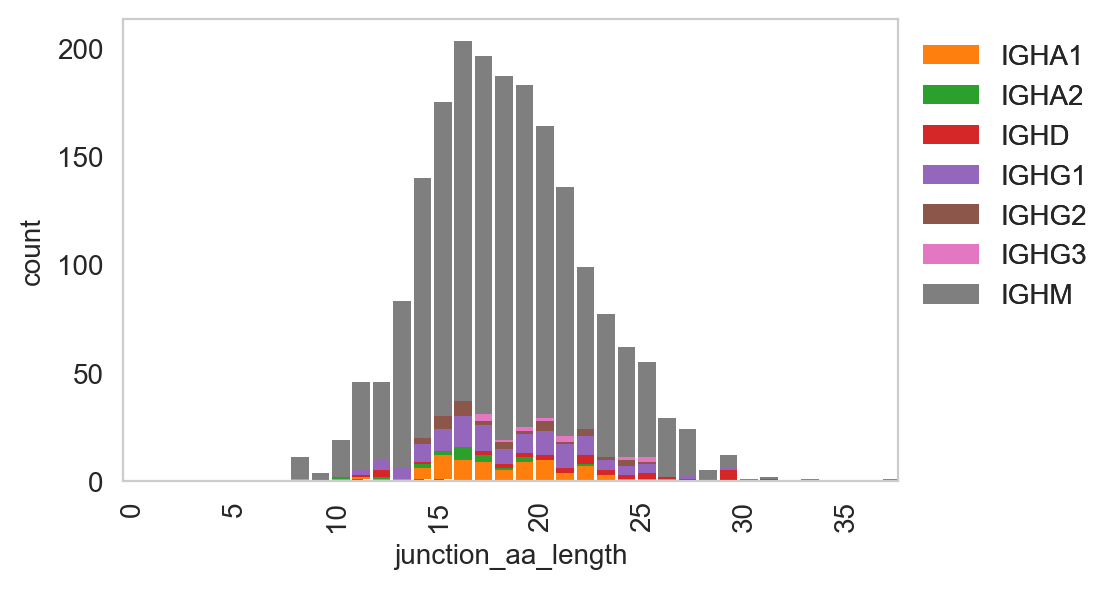

In [32]:
ddl.pl.spectratype(
    vdj_subset,
    color="junction_aa_length",
    groupby="c_call",
    locus="IGH",
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

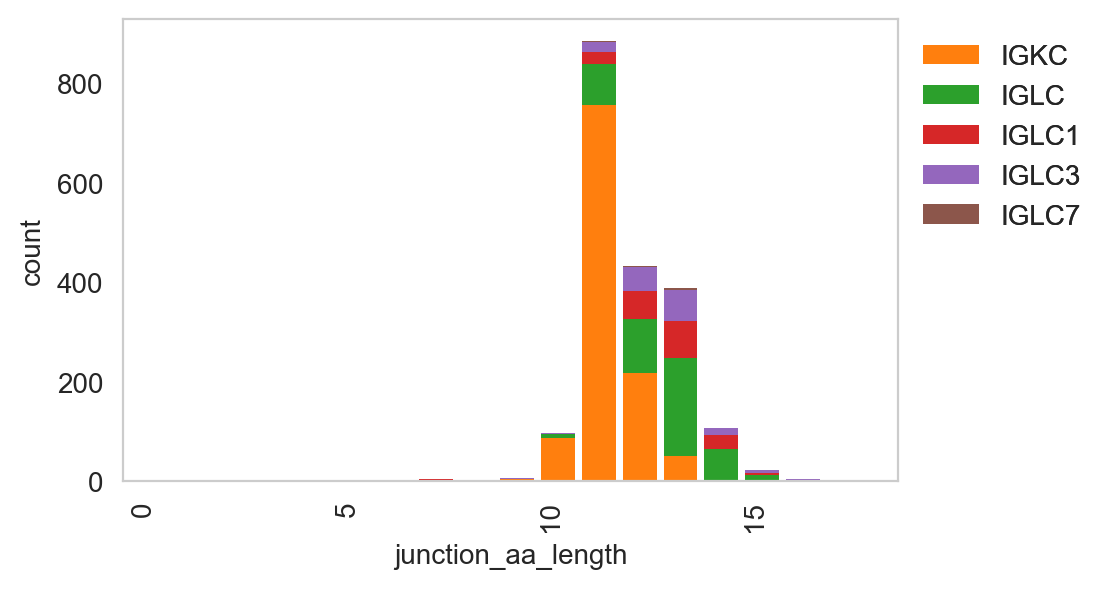

In [33]:
ddl.pl.spectratype(
    vdj_subset,
    color="junction_aa_length",
    groupby="c_call",
    locus=["IGK", "IGL"],
)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
plt.show()

### `ddl.pl.clone_overlap`
There is now a circos-style clone overlap function where it looks for whather different samples share a clone. If they do, an arc/connection will be drawn between them.

In [34]:
ddl.tl.clone_overlap(adata, groupby="leiden")

Calculating clone overlap
 finished: Updated AnnData: 
   'uns', clone overlap table (0:00:00)


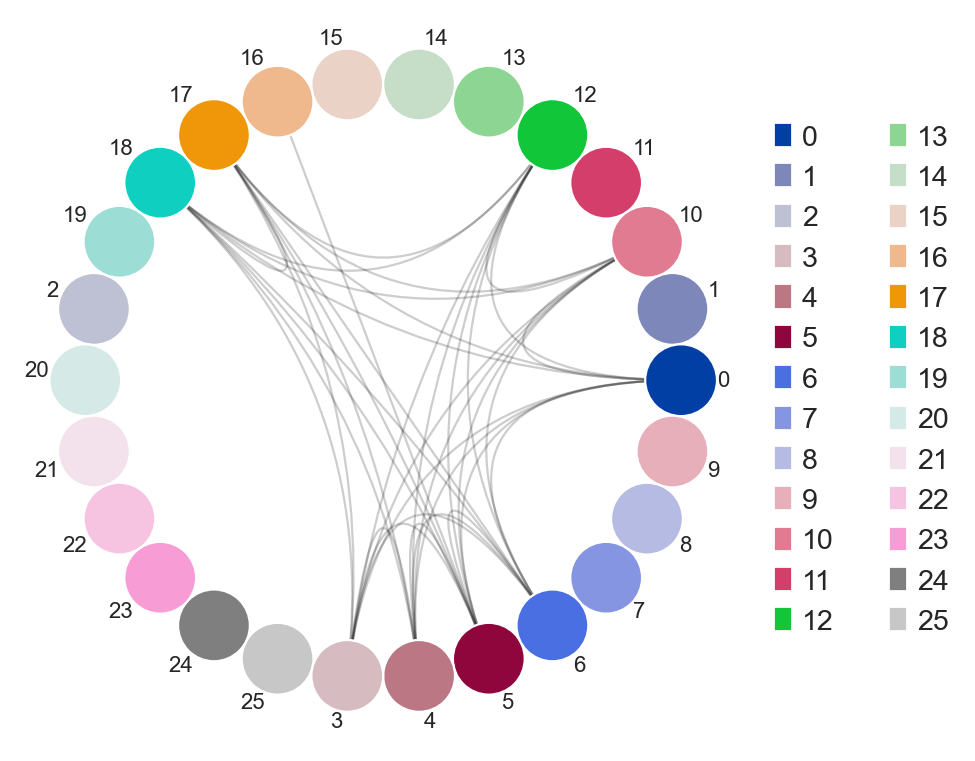

In [35]:
sc.set_figure_params(figsize=[6, 6])
ddl.pl.clone_overlap(adata, groupby="leiden")
plt.show()

Other use cases for this would be, for example, to plot nodes as individual samples and the colors as group classifications of the samples. As long as this information is found in the `.obs` column in the `AnnData`, or even `Dandelion.metadata`, this will work.

You an also specify `weighted_overlap = True` and the thickness of the edges will reflect the number of cells found to overlap between the nodes/samples.

Calculating clone overlap


 finished: Updated AnnData: 
   'uns', clone overlap table (0:00:00)


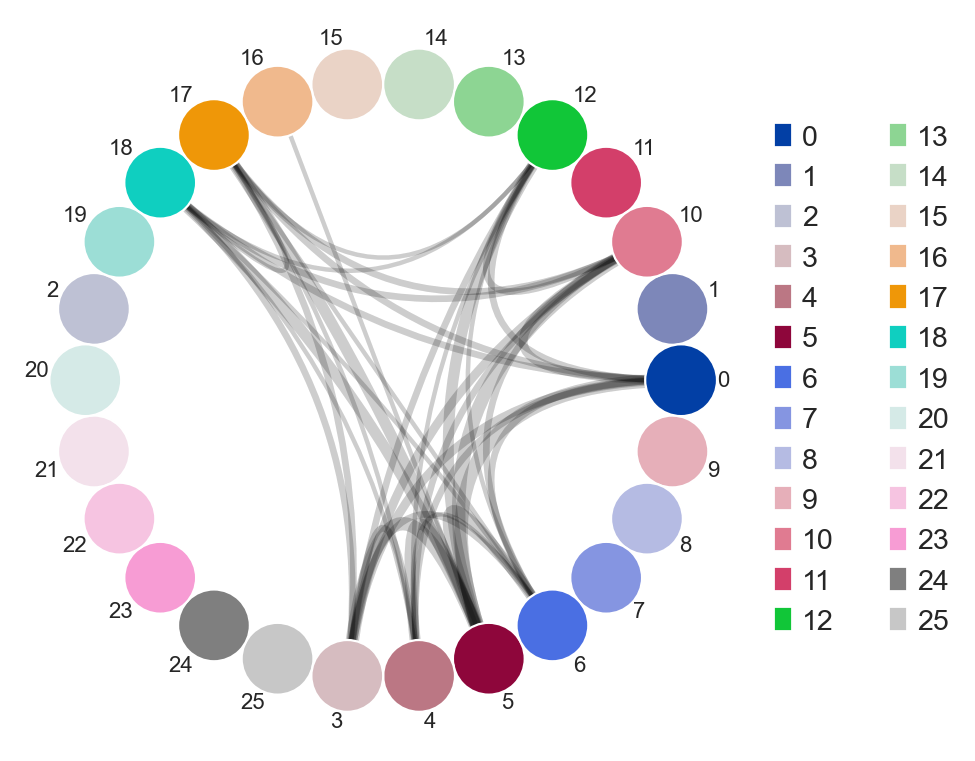

In [36]:
ddl.tl.clone_overlap(adata, groupby="leiden", weighted_overlap=True)
ddl.pl.clone_overlap(adata, groupby="leiden", weighted_overlap=True)
plt.show()

You can also specify `colorby` option. For example, if you provide a combined column to `groupby`, like `group_leiden`, you can specify `group`, `leiden` or `group_leiden` to `colorby`. Experiment around to see the different behaviour!

You can also visualise this as a heatmap by specifying `as_heatmap = True`.

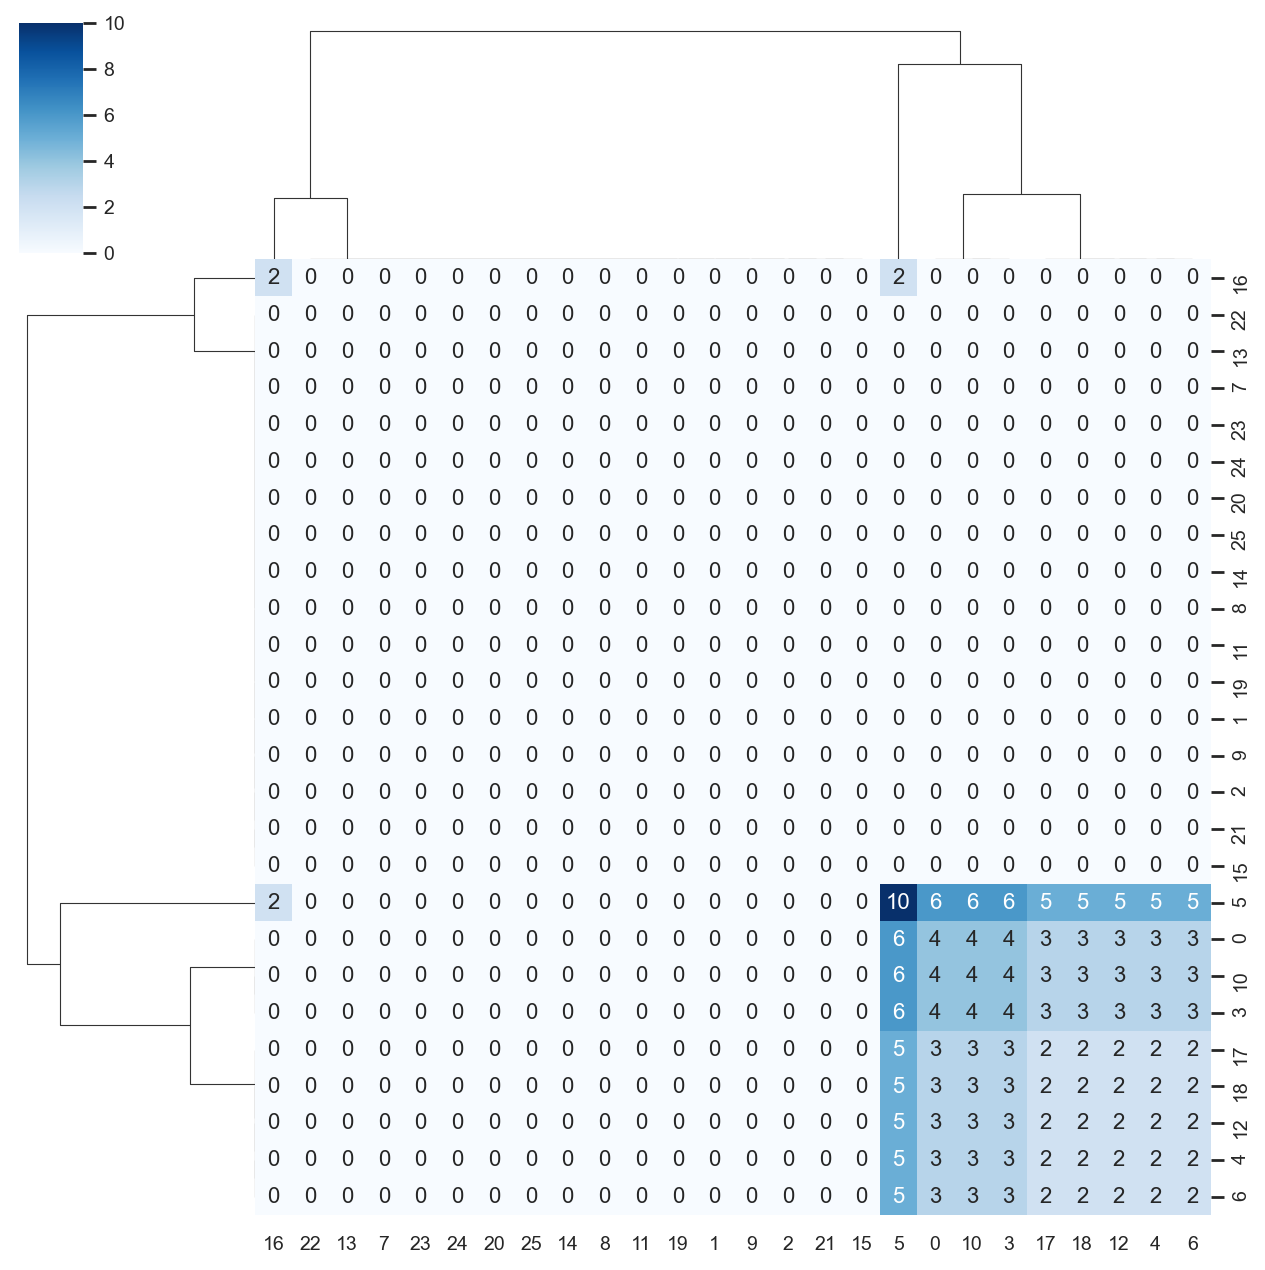

In [37]:
import seaborn as sns

sns.set(font_scale=0.8)

ddl.pl.clone_overlap(
    adata,
    groupby="leiden",
    weighted_overlap=True,
    as_heatmap=True,
    # seaborn clustermap kwargs
    cmap="Blues",
    annot=True,
    figsize=(8, 8),
    annot_kws={"size": 10},
    fmt="g",
)
plt.show()

Note: `colorby` option with `as_heatmap=True` doesn't do anything.

### `tl.vj_usage_pca`

You can also compute the V/J gene usage in your various groups of interest. This function will return a new `AnnData` where instead of `cells` (obs) by `gene` (var), it will be `groupby` (obs) by `V/J genes` (var).

For example, I'm interested if the leiden clusters within each donor's sample use V/J genes differently:

In [38]:
# first make a concatenated group
adata.obs["sample_id_leiden"] = [
    s + "_" + l for s, l in zip(adata.obs["sample_id"], adata.obs["leiden"])
]
new_adata = ddl.tl.vj_usage_pca(
    adata,
    groupby="sample_id_leiden",
    mode="B",  # because B cells, use abT and gdT for alpha-beta and gamma-delta T cells respectively
    transfer_mapping=[
        "sample_id",
        "leiden",
    ],  # this transfers the sample_id and leiden values separately. if not provided, only sample_id_leiden is transferred.
    n_comps=3,  # 3 because the example is small here. the default is set at 30
)
new_adata

Computing PCA for V/J gene usage
computing PCA
    with n_comps=3
    finished (0:00:00)
 finished: Returned AnnData: 
   'obsm', X_pca for V/J gene usage (0:00:00)


/opt/homebrew/Caskroom/miniforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:226: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None


AnnData object with n_obs × n_vars = 4 × 126
    obs: 'cell_type', 'cell_count', 'sample_id', 'leiden'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

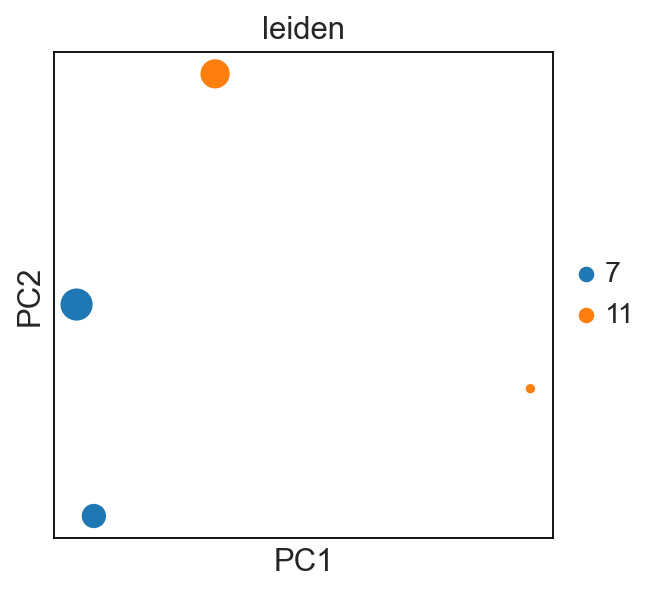

In [39]:
sc.set_figure_params()

sc.pl.pca(new_adata, color="leiden", size=new_adata.obs["cell_count"])
# each dot is a `sample_id_leiden`. Check the .obs

### `tl.productive_ratio`/`pl.productive_ratio`

This new function lets you quantify what is the distribution of productive versus non-productive contigs at a cell-level. To do this, we need to re-check the `Dandelion` object so that non-productive columns are not removed.

In [40]:
vdj2, adata2 = ddl.pp.check_contigs(vdj, adata, productive_only=False)

Filtering contigs


Preparing data: 5050it [00:00, 7402.25it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 2111/2111 [00:06<00:00, 342.82it/s]


Initializing Dandelion object
Transferring network
 finished: updated `.obs` with `.metadata`
 (0:00:00)


In [41]:
ddl.tl.productive_ratio(adata2, vdj2, groupby="leiden", locus="IGK")

Tabulating productive ratio
 finished: Updated AnnData: 
   'uns', productive_ratio (0:00:00)


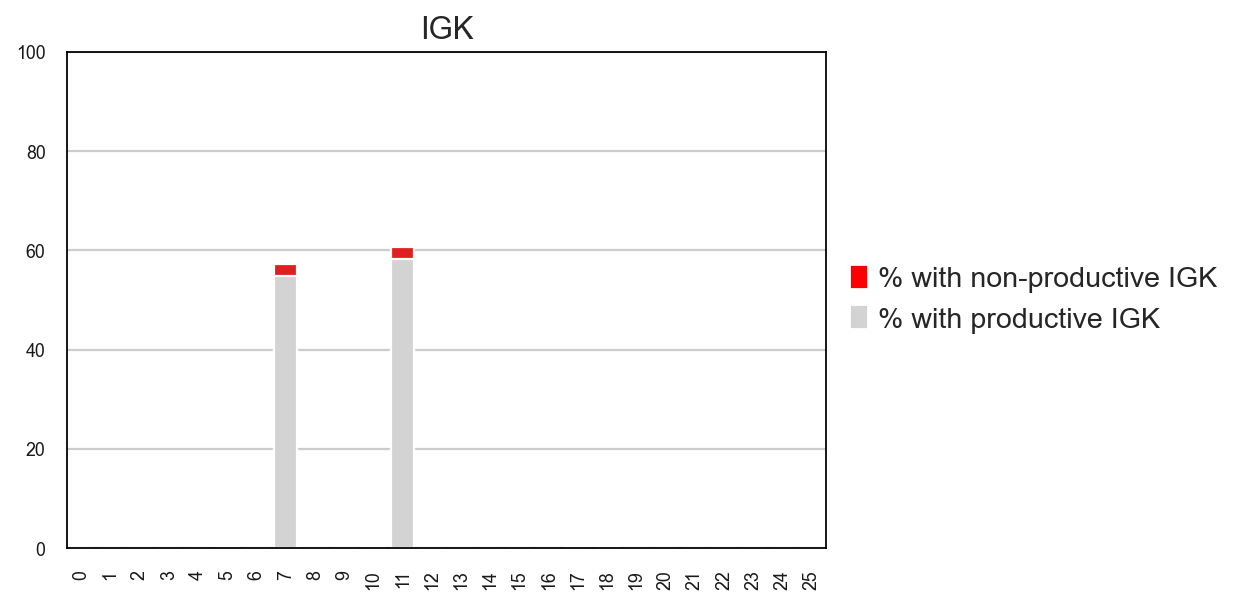

In [42]:
ddl.pl.productive_ratio(adata2, palette=["red", "lightgrey"])
plt.tight_layout()
# plt.savefig('plot.pdf')
plt.show()